In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits
from one_datum import uncertainty

In [3]:
with fits.open(uncertainty.get_filename()) as f:
    hdr = f[0].header
    model = f[1].data
    mask = f[2].data

color_bins = np.linspace(hdr["MIN_COL"], hdr["MAX_COL"], hdr["NUM_COL"] + 1)
mag_bins = np.linspace(hdr["MIN_MAG"], hdr["MAX_MAG"], hdr["NUM_MAG"] + 1)

color_bin_centers = 0.5 * (color_bins[1:] + color_bins[:-1])
mag_bin_centers = 0.5 * (mag_bins[1:] + mag_bins[:-1])

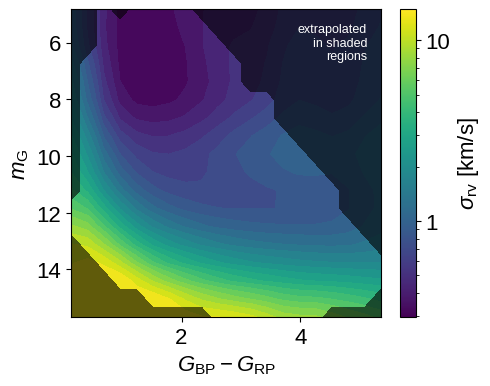

In [4]:
plt.figure(figsize=(5, 4))

sigma_rv = np.exp(model)
levels = np.exp(
    np.linspace(model[mask == 1].min(), model[mask == 1].max(), 25)
)
norm = mpl.colors.LogNorm(vmin=levels[0], vmax=levels[-1])
sigma_rv[sigma_rv >= levels[-1]] = levels[-1] - 1e-5

plt.contourf(
    color_bin_centers,
    mag_bin_centers,
    sigma_rv,
    levels=levels,
    norm=norm,
)

color_array = np.zeros((2, 4))
color_array[:, -1] = [1.0, 0]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    name="shading", colors=color_array
)
plt.contourf(
    color_bin_centers,
    mag_bin_centers,
    1.5 * mask,
    levels=1,
    cmap=cmap,
    vmin=0,
    vmax=1,
)

sm = plt.cm.ScalarMappable(norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, label=r"$\sigma_\mathrm{rv}$ [km/s]")
cbar.ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

plt.annotate(
    "extrapolated\nin shaded\nregions",
    xy=(1, 1),
    xycoords="axes fraction",
    ha="right",
    va="top",
    color="w",
    xytext=(-10, -10),
    textcoords="offset points",
    fontsize=9,
)

plt.ylim(plt.ylim()[::-1])
plt.ylabel("$m_\mathrm{G}$")
plt.xlabel("$G_\mathrm{BP}-G_\mathrm{RP}$")

plt.savefig("rv_uncert_contour.pdf", bbox_inches="tight")